# Analyzing Rooms data Vs Location, AirBnB Mexico City (2014-July 2019)

## Clean Data Frame to form groupby s

We will rename columns in oirder to have them with new name to start working with the Data Frame:

In [125]:
#import variables and read cvs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "data_base_clean.csv"
rooms_df = pd.read_csv(file, encoding="ISO-8859-1")
rooms_df.head()

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,bed_type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19,-99,Private room,1957,1,10,11/05/18,1,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19,-99,Private room,1906,1,39,02/05/19,0,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89
2,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtemoc,Roma Norte,6700,19,-99,Entire home/apt,1620,3,37,01/01/19,0,1,173,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",100
3,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtemoc,Condesa,6140,19,-99,Private room,953,2,51,05/04/19,3,3,180,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",98
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtemoc,Hipodromo,6100,19,-99,Entire home/apt,1810,2,39,24/02/19,0,3,340,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",98


In [126]:
#For our purpose we name columns as convenient: 
new_rooms_df=rooms_df.rename(
    columns={"host_name": "Host name",
            "neighbourhood_cleansed":"County",
            "room_type":"Room type",
            "bed_type":"Bed type"})
new_rooms_df

,id,name,host_id,Host name,County,neighbourhood,zipcode,latitude,longitude,Room type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Bed type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19,-99,Private room,1957,1,10,11/05/18,1,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19,-99,Private room,1906,1,39,02/05/19,0,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89
2,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtemoc,Roma Norte,6700,19,-99,Entire home/apt,1620,3,37,01/01/19,0,1,173,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",100
3,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtemoc,Condesa,6140,19,-99,Private room,953,2,51,05/04/19,3,3,180,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",98
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtemoc,Hipodromo,6100,19,-99,Entire home/apt,1810,2,39,24/02/19,0,3,340,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",98
5,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Coyoacan,Coyoacan,4100,19,-99,Entire home/apt,1048,3,92,12/04/19,1,4,276,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",98
6,70737,Great studio Coyoacan!,212109,Trisha,Coyoacan,Coyoacan,4100,19,-99,Entire home/apt,1124,3,31,20/07/15,0,4,294,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",99
7,180808,"Huge Luxurious Suite 70's style, perfectly loc...",36836,Roberto,Cuauhtemoc,Juarez,6600,19,-99,Entire home/apt,1029,3,32,10/03/19,0,1,328,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",94
8,245507,TRENDY APARTMENT IN ZONA ROSA / JUAREZ DISTRICT,1288063,Francisco & Rodolfo,Cuauhtemoc,Juarez,6600,19,-99,Entire home/apt,1315,1,246,08/05/19,3,16,348,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",97
9,246057,HIP APARTMENT ONE BLOCK REFORMA,1288063,Francisco & Rodolfo,Cuauhtemoc,Juarez,6600,19,-99,Entire home/apt,1429,1,229,01/05/19,2,16,365,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",98


## Count room types

Start counting the room types we have in our data set

In [127]:
#count type of rooms
clean_room_df = new_rooms_df["Room type"]
candid_count=clean_room_df.value_counts()
candid_count

Entire home/apt    6153
Private room       4419
Shared room         124
Name: Room type, dtype: int64

In [128]:
#We get the number of rooms in the dataset
total_rooms=len(new_rooms_df["Room type"])
total_rooms

10696

## Get data to compare Room Type VS Location 

We will do some groupbys in oirder to get dataframes to know specififc information:

### Room type by location with its metrics

We can know in which county are the the room type and know their Price Stats (per night), Count, Percentage, Total of reviews and Avg Rating score.

In [129]:
#Build groupby with Neighbourhood and room type
roomtype_neighborhood=new_rooms_df.groupby(["County","Room type"])

roomtype_neighborhood_count=roomtype_neighborhood['Room type'].count()
roomtype_neighborhood_maxprice=roomtype_neighborhood['price'].max()
roomtype_neighborhood_minprice=roomtype_neighborhood['price'].min()
roomtype_neighborhood_avgprice=roomtype_neighborhood['price'].mean()
roomtype_neighborhood_percentage=np.round((roomtype_neighborhood_count/total_rooms)*100,decimals=2)
roomtype_reviews=roomtype_neighborhood['number_of_reviews'].sum()
roomtype_reviews_score=roomtype_neighborhood['review_scores_rating'].mean()

#Create a summary data frame to hold the results
roomtype_neighborhood_df=pd.DataFrame({"Room Count":roomtype_neighborhood_count,
                                "Max Room Price":roomtype_neighborhood_maxprice,
                                      "Min Room Price":roomtype_neighborhood_minprice,
                                      "Avg Room Price":roomtype_neighborhood_avgprice,
                                      "Representative Percentage (%)":roomtype_neighborhood_percentage,
                                      "Total of reviews":roomtype_reviews,
                                      "Avg Reviews Score Rating":roomtype_reviews_score})

#Map format
roomtype_neighborhood_df["Max Room Price"]=roomtype_neighborhood_df["Max Room Price"].map("${:.2f}".format)
roomtype_neighborhood_df["Min Room Price"]=roomtype_neighborhood_df["Min Room Price"].map("${:.2f}".format)
roomtype_neighborhood_df["Avg Room Price"]=roomtype_neighborhood_df["Avg Room Price"].map("${:.2f}".format)
roomtype_neighborhood_df["Avg Reviews Score Rating"]=roomtype_neighborhood_df["Avg Reviews Score Rating"].map("{:.2f}".format)
                                                                                                              
# Save csv file
roomtype_neighborhood_df.to_csv("roomtype_neigbourhood_stats.csv",index=True)
                                                                                                              
roomtype_neighborhood_df

Room Count Max Room Price Min Room Price  \
County              Room type                                                   
Alvaro Obregon      Entire home/apt         107       $6251.00        $191.00   
                    Private room            155       $5317.00        $172.00   
                    Shared room               2        $495.00        $400.00   
Azcapotzalco        Entire home/apt          14       $1748.00        $419.00   
                    Private room             12        $760.00        $190.00   
                    Shared room               1        $399.00        $399.00   
Benito Juarez       Entire home/apt         928      $23974.00        $191.00   
                    Private room           1060       $7985.00        $172.00   
                    Shared room              21        $991.00        $191.00   
Coyoacan            Entire home/apt         308      $11587.00        $191.00   
                    Private room            431      $28586.00        $172.00   
                    Shared room               9       $2649.00        $190.00   
Cuauhtemoc          Entire home/apt        3538      $36484.00          $0.00   
                    Private room           2067      $57172.00        $172.00   
                    Shared room              75       $4669.00        $190.00   
Gustavo A. Madero   Entire home/apt           5       $1824.00        $399.00   
                    Private room              7        $551.00        $209.00   
Iztacalco           Entire home/apt          22       $1296.00        $248.00   
                    Private room             10        $400.00        $210.00   
Iztapalapa          Entire home/apt           6       $2001.00        $667.00   
                    Private room              9        $495.00        $229.00   
Miguel Hidalgo      Entire home/apt        1212     $190573.00          $0.00   
                    Private room            658      $10653.00          $0.00   
                    Shared room              15       $2888.00        $191.00   
Venustiano Carranza Entire home/apt          13       $4193.00        $380.00   
                    Private room             10        $874.00        $191.00   
                    Shared room               1        $191.00        $191.00   

                                    Avg Room Price  \
County              Room type                        
Alvaro Obregon      Entire home/apt       $1168.40   
                    Private room           $670.65   
                    Shared room            $447.50   
Azcapotzalco        Entire home/apt        $915.07   
                    Private room           $365.92   
                    Shared room            $399.00   
Benito Juarez       Entire home/apt       $1026.78   
                    Private room           $433.58   
                    Shared room            $370.33   
Coyoacan            Entire home/apt       $1231.65   
                    Private room           $658.09   
                    Shared room            $542.11   
Cuauhtemoc          Entire home/apt       $1542.79   
                    Private room           $635.54   
                    Shared room            $355.97   
Gustavo A. Madero   Entire home/apt       $1007.00   
                    Private room           $325.71   
Iztacalco           Entire home/apt        $531.82   
                    Private room           $251.80   
Iztapalapa          Entire home/apt       $1254.83   
                    Private room           $330.33   
Miguel Hidalgo      Entire home/apt       $2191.81   
                    Private room           $662.68   
                    Shared room            $586.27   
Venustiano Carranza Entire home/apt        $923.08   
                    Private room           $304.60   
                    Shared room            $191.00   

                                     Representative Percentage (%)  \
County              Room type                     

# Grouped Bar plot

In this bar plot it is represented the counties and how many room types they have.

In [130]:
#We will create the appropriate data framework to get the count of the rooms by county

#filter by Entire home/apt and count
total_entire_roomtype=new_rooms_df.loc[new_rooms_df["Room type"] == "Entire home/apt"]
roomtype_entire_count_neighborhood=total_entire_roomtype.groupby(["County"])

entire_roomtypecount_neighborhood_count=roomtype_entire_count_neighborhood['Room type'].count()

 #filter by Private room and count
total_private_roomtype=new_rooms_df.loc[new_rooms_df["Room type"] == "Private room"]
roomtype_private_count_neighborhood=total_private_roomtype.groupby(["County"])

private_roomtypecount_neighborhood_count=roomtype_private_count_neighborhood['Room type'].count()

 #filter by Shared room and count
total_shared_roomtype=new_rooms_df.loc[new_rooms_df["Room type"] == "Shared room"]
roomtype_shared_count_neighborhood=total_shared_roomtype.groupby(["County"])

shared_roomtypecount_neighborhood_count=roomtype_shared_count_neighborhood['Room type'].count()

#Create a summary data frame to hold the results
roomtypecount_neighborhood_df=pd.DataFrame({"Entire home/apt Count":entire_roomtypecount_neighborhood_count,
                                           "Private room Count":private_roomtypecount_neighborhood_count,
                                           "Shared room Count":shared_roomtypecount_neighborhood_count})

#Then we take out NaNs and give appropriate format to the data frame, 'Shared room' column is a float data type column
roomtypecount_neighborhood_df['Shared room Count'] =roomtypecount_neighborhood_df['Shared room Count'].fillna(0)
roomtypecount_neighborhood_df['Shared room Count']=roomtypecount_neighborhood_df['Shared room Count'].astype(int)


roomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count
Alvaro Obregon,107,155,2
Azcapotzalco,14,12,1
Benito Juarez,928,1060,21
Coyoacan,308,431,9
Cuauhtemoc,3538,2067,75
Gustavo A. Madero,5,7,0
Iztacalco,22,10,0
Iztapalapa,6,9,0
Miguel Hidalgo,1212,658,15
Venustiano Carranza,13,10,1


In [131]:
#Then we take index into a column in order to get the length of the column
roomtypecount_neighborhood_df['County'] = roomtypecount_neighborhood_df.index

roomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count,County
Alvaro Obregon,107,155,2,Alvaro Obregon
Azcapotzalco,14,12,1,Azcapotzalco
Benito Juarez,928,1060,21,Benito Juarez
Coyoacan,308,431,9,Coyoacan
Cuauhtemoc,3538,2067,75,Cuauhtemoc
Gustavo A. Madero,5,7,0,Gustavo A. Madero
Iztacalco,22,10,0,Iztacalco
Iztapalapa,6,9,0,Iztapalapa
Miguel Hidalgo,1212,658,15,Miguel Hidalgo
Venustiano Carranza,13,10,1,Venustiano Carranza


In [143]:
# Create arrays to plot shared bars that contains the count by room type in each County
entire_home_list=roomtypecount_neighborhood_df["Entire home/apt Count"].tolist()
private_room_list=roomtypecount_neighborhood_df["Private room Count"].tolist()
shared_room_list=roomtypecount_neighborhood_df["Shared room Count"].tolist()
x_axis = np.arange(len(roomtypecount_neighborhood_df['County']))

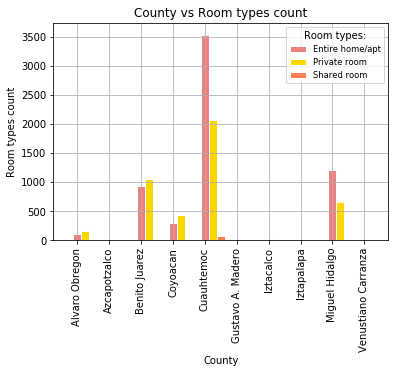

In [146]:
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = entire_home_list
bars2 = private_room_list
bars3 = shared_room_list
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.grid()

# Make the plot
plt.bar(r1, bars1, color='lightcoral', width=barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(r2, bars2, color='gold', width=barWidth, edgecolor='white', label='Private room')
plt.bar(r3, bars3, color='coral', width=barWidth, edgecolor='white', label='Shared room')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,roomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(roomtypecount_neighborhood_df['Entire home/apt Count']+200))
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="best",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

#Save figure
plt.savefig("Images/Count_general.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Select some Counties to have a closer view of the Data
('Azcapotzalco','Gustavo A. Madero','Iztacalco','Iztapalapa','Venustiano Carranza')

In [134]:
#We make new data frame with some counties, using loc:
inc_roomoomtypecount_neighborhood_df=roomtypecount_neighborhood_df.loc[['Azcapotzalco','Gustavo A. Madero','Iztacalco','Iztapalapa','Venustiano Carranza']]
inc_roomoomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count,County
Azcapotzalco,14,12,1,Azcapotzalco
Gustavo A. Madero,5,7,0,Gustavo A. Madero
Iztacalco,22,10,0,Iztacalco
Iztapalapa,6,9,0,Iztapalapa
Venustiano Carranza,13,10,1,Venustiano Carranza


In [135]:
# Create arrays to plot shared bars that contains the count by room type in each County
inc_entire_home_list=inc_roomoomtypecount_neighborhood_df["Entire home/apt Count"].tolist()
inc_private_room_list=inc_roomoomtypecount_neighborhood_df["Private room Count"].tolist()
inc_shared_room_list=inc_roomoomtypecount_neighborhood_df["Shared room Count"].tolist()
inc_x_axis = np.arange(len(inc_roomoomtypecount_neighborhood_df['County']))

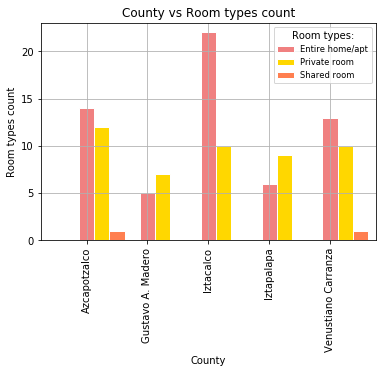

In [151]:
# set width of bar
inc_barWidth = 0.25

# set height of bar
inc_bars1 = inc_entire_home_list
inc_bars2 = inc_private_room_list
inc_bars3 = inc_shared_room_list
# Set position of bar on X axis
inc_r1 = np.arange(len(inc_bars1))
inc_r2 = [x + inc_barWidth for x in inc_r1]
inc_r3 = [x + inc_barWidth for x in inc_r2]

plt.grid()

# Make the plot
plt.bar(inc_r1, inc_bars1, color='lightcoral', width=inc_barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(inc_r2, inc_bars2, color='gold', width=inc_barWidth, edgecolor='white', label='Private room')
plt.bar(inc_r3, inc_bars3, color='coral', width=inc_barWidth, edgecolor='white', label='Shared room')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,inc_roomoomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(inc_x_axis)-0.25)
plt.ylim(0, max(inc_roomoomtypecount_neighborhood_df['Entire home/apt Count'])+1)
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="best",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

#Save figure
plt.savefig("Images/Count_specific.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Select some Counties to have a closer view of the Data 2

'Alvaro Obregon','Benito Juarez','Coyoacan','Miguel Hidalgo'

In [137]:
#We make new data frame with some counties, using loc:
inc2_roomoomtypecount_neighborhood_df=roomtypecount_neighborhood_df.loc[['Alvaro Obregon','Benito Juarez','Coyoacan','Miguel Hidalgo']]
inc2_roomoomtypecount_neighborhood_df

,Entire home/apt Count,Private room Count,Shared room Count,County
Alvaro Obregon,107,155,2,Alvaro Obregon
Benito Juarez,928,1060,21,Benito Juarez
Coyoacan,308,431,9,Coyoacan
Miguel Hidalgo,1212,658,15,Miguel Hidalgo


In [138]:
# Create arrays to plot shared bars that contains the count by room type in each County
inc2_entire_home_list=inc2_roomoomtypecount_neighborhood_df["Entire home/apt Count"].tolist()
inc2_private_room_list=inc2_roomoomtypecount_neighborhood_df["Private room Count"].tolist()
inc2_shared_room_list=inc2_roomoomtypecount_neighborhood_df["Shared room Count"].tolist()
inc2_x_axis = np.arange(len(inc2_roomoomtypecount_neighborhood_df['County']))

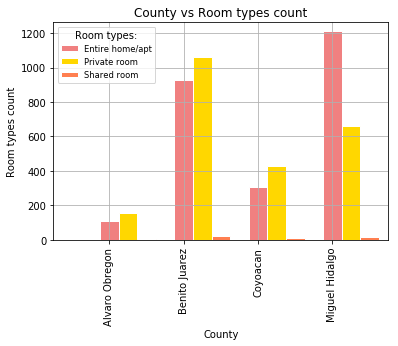

In [149]:
# set width of bar
inc2_barWidth = 0.25

# set height of bar
inc2_bars1 = inc2_entire_home_list
inc2_bars2 = inc2_private_room_list
inc2_bars3 = inc2_shared_room_list
# Set position of bar on X axis
inc2_r1 = np.arange(len(inc2_bars1))
inc2_r2 = [x + inc2_barWidth for x in inc2_r1]
inc2_r3 = [x + inc2_barWidth for x in inc2_r2]

plt.grid()

# Make the plot
plt.bar(inc2_r1, inc2_bars1, color='lightcoral', width=inc2_barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(inc2_r2, inc2_bars2, color='gold', width=inc2_barWidth, edgecolor='white', label='Private room')
plt.bar(inc2_r3, inc2_bars3, color='coral', width=inc2_barWidth, edgecolor='white', label='Shared room')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,inc2_roomoomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(inc2_x_axis)-0.25)
plt.ylim(0, max(inc2_roomoomtypecount_neighborhood_df['Entire home/apt Count'])+50)
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="upper left",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

#Save figure
plt.savefig("Images/Count_specific2.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Graph just the Shared Rooms

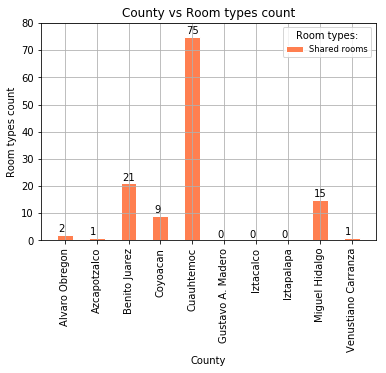

In [150]:
# set width of bar
barWidth = 0.5

# set height of bar
bars = shared_room_list
# Set position of bar on X axis
r3 = np.arange(len(bars1))

plt.grid()

# Make the plot
plt.bar(r3, bars, color='coral', width=barWidth, edgecolor='white', label='Shared rooms')

#We make the plot properties
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,roomtypecount_neighborhood_df['County'], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(roomtypecount_neighborhood_df['Shared room Count'])+5)
plt.title("County vs Room types count")
plt.legend(title="Room types:",loc="best",markerscale=.7, fontsize="small")
plt.xlabel("County")
plt.ylabel("Room types count")

xlocs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]

for i, v in enumerate(bars):
    plt.text(xlocs[i] - 1.2, v +1, str(v))

#Save figure
plt.savefig("Images/Count_shared.png",bbox_inches = 'tight')

#Show figure
plt.show()

## Pie Chart

In [141]:
#Create DataFrame
roomtype_chart=new_rooms_df.groupby(["Room type"])

roomtype_neighborhood_count=roomtype_chart['Room type'].count()

#Create a summary data frame to hold the results
roomtype_chart_df=pd.DataFrame({"Room Count":roomtype_neighborhood_count
                             })
roomtype_chart_df

,Room Count
Room type,
Entire home/apt,6153
Private room,4419
Shared room,124


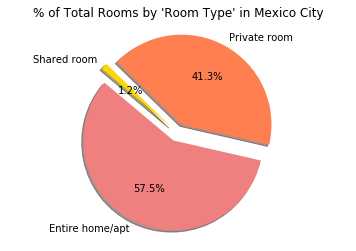

In [142]:

#Define data of the pie chart
types=roomtype_chart_df.index
rooms=roomtype_chart_df['Room Count']
colors=["lightcoral","coral","gold"]
explode = (0.1,0.1,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.title("% of Total Rooms by 'Room Type' in Mexico City")
plt.pie(rooms, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Save figure
plt.savefig("Images/Proportion_Room_types_cdmx.png")

# Show Figure
plt.show()